In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

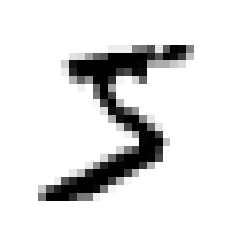

In [21]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [11]:
import numpy as np

y=y.astype(np.uint8)

In [12]:
X_train,X_test,y_train,y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle= True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [48]:
from sklearn.base import BaseEstimator

class Never5Classsifier(BaseEstimator):
    def fit(self, X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [49]:
never_5_clf = Never5Classsifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring = "accuracy")



array([0.91125, 0.90855, 0.90915])

In [50]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5,cv= 3)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [52]:
y_train_perfect_predictions = y_train_5 #완벽한 분류기
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [53]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [54]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [55]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [56]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [59]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [60]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [62]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv = 3, 
                             method = "decision_function")

In [63]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds = precision_recall_curve(y_train_5, y_scores)


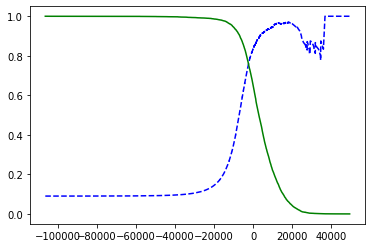

In [71]:
def plot_recall_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label = "precision")
    plt.plot(thresholds, recalls[:-1],"g-",label = "recalls")
    [...]

plot_recall_threshold(precisions,recalls,thresholds)
plt.show()

In [72]:
threshold_90_precision = thresholds[np.argmax(precisions > 0.90)]

In [73]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [74]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [75]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [77]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

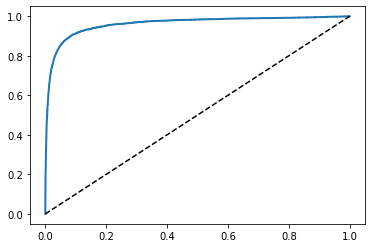

In [79]:
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr,linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    [...]

plot_roc_curve(fpr,tpr)
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf,X_train, y_train_5,cv=3,
                                   method="predict_proba")

In [82]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                      y_scores_forest)

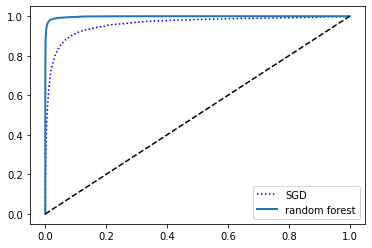

In [83]:
plt.plot(fpr, tpr,"b:",label = "SGD")
plot_roc_curve(fpr_forest,tpr_forest,"random forest")
plt.legend(loc="lower right")
plt.show()

In [84]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145